# Modeling: Decision Tree

### Import packages and modules

In [1]:
import csv
import numpy as np
import pandas as pd
import math

import seaborn as sns
from matplotlib import pyplot as plt

from imblearn.under_sampling import RandomUnderSampler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import *

from sklearn.tree import DecisionTreeClassifier

### Import data

In [2]:
%run /Users/apassan/Documents/03_Professional/07_GitHubRepo/APassan_Portfolio/Classification_CreditCardFraud/scripts/model_prep.py

### Confirm X and Y Shapes

In [3]:
# Print the shapes to ensure the matrix dimensions line up
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (139844, 7)
Y_train shape: (139844,)
X_test shape: (34962, 7)
Y_test shape: (34962,)


### Baseline Model

Let's first create a baseline naive bayes model.

In [4]:
# Baseline Model 
dt_baseline = DecisionTreeClassifier(criterion='entropy', random_state=1)

dt_baseline.fit(X_train, Y_train)

Y_pred_dt_baseline = dt_baseline.predict(X_test)

Text(33.0, 0.5, 'Truth')

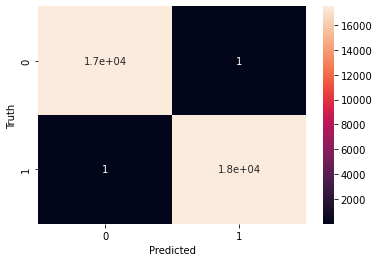

In [5]:
cm_baseline = confusion_matrix(Y_test, Y_pred_dt_baseline)

sns.heatmap(cm_baseline, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [7]:
print(classification_report(Y_test, Y_pred_dt_baseline))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17449
         1.0       1.00      1.00      1.00     17513

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



### Improve the Model

Now let us run the grid search and cross validation to improve our INSERT model.

Specifically we will try to tune our regularization parameter *max_depth* parameter.

MAKE IT ABLE TO GENERALIZE BETTER

In [8]:
# Find the best parameters
param_grid = {'max_depth': [4, 8, 12]}

dt_gscv = GridSearchCV(DecisionTreeClassifier(random_state = 1, criterion = 'entropy'),
                       param_grid=param_grid, 
                       cv = 5,
                       refit = True,
                       verbose = 2)

dt_gscv.fit(X_train, Y_train)

print(dt_gscv.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=8; total time=   0.1s
[CV] END ........................................max_depth=8; total time=   0.2s
[CV] END ........................................max_depth=8; total time=   0.1s
[CV] END ........................................max_depth=8; total time=   0.1s
[CV] END ........................................max_depth=8; total time=   0.1s
[CV] END .......................................max_depth=12; total time=   0.1s
[CV] END .......................................m

### Final Model

In [9]:
# Improved Model 
dt_fin = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', max_depth = 8)

dt_fin.fit(X_train, Y_train)

Y_pred_dt_fin = dt_fin.predict(X_test)

Text(33.0, 0.5, 'Truth')

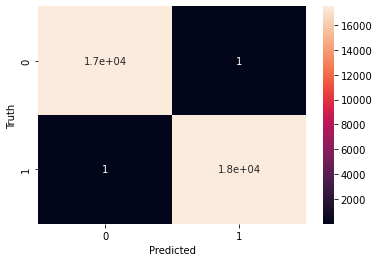

In [10]:
cm_fin = confusion_matrix(Y_test, Y_pred_dt_fin)

sns.heatmap(cm_fin, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [11]:
print(classification_report(Y_test, Y_pred_dt_fin))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17449
         1.0       1.00      1.00      1.00     17513

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962

